In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

In [3]:
data=pd.read_csv("C:/Ml-Projects/Diabetes_Prediction/Dataset/diabetes.csv")

In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: ylabel='Age'>

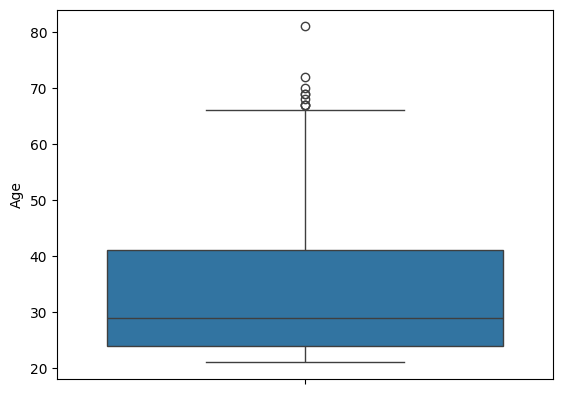

In [5]:
sns.boxplot(data['Age'])


<Axes: >

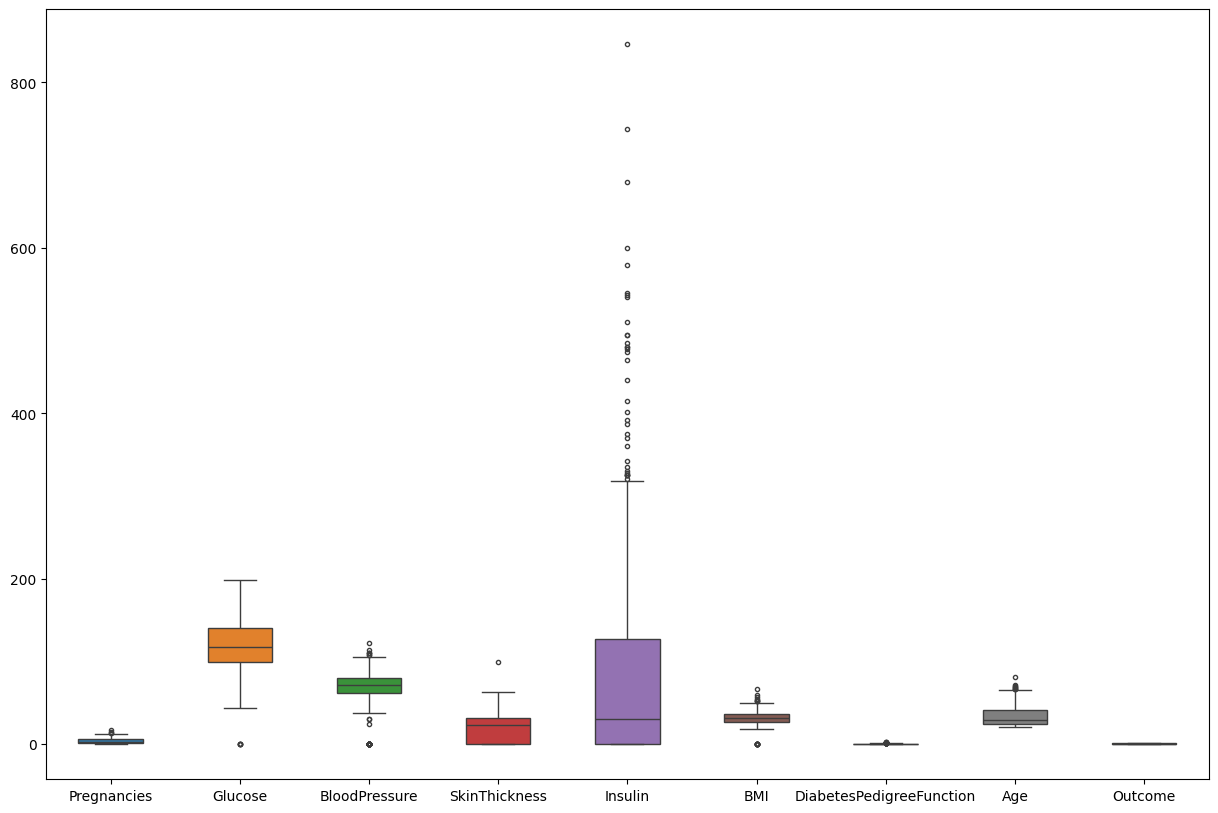

In [6]:
fig,ax=plt.subplots(figsize=[15,10])
sns.boxplot(data=data,width=0.5,ax=ax,fliersize=3)

In [7]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Separating independent and dependent features

In [9]:
x=data.drop(columns="Outcome")

In [10]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [11]:
y=data["Outcome"]

In [12]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
x_train.shape


(614, 8)

In [15]:
x_test.shape


(154, 8)

In [16]:
import pickle
def standard_scaler(x_train,x_test):
    scaler=StandardScaler()
    x_train_scaled=scaler.fit_transform(x_train)
    x_test_scaled=scaler.transform(x_test)
    file=open("C:/Ml-Projects/Diabetes_Prediction/Model/standardScalar.pkl","wb")
    pickle.dump(scaler,file)
    file.close()
    return  x_train_scaled,x_test_scaled

In [17]:
x_train_scaled,x_test_scaled=standard_scaler(x_train,x_test)
x_train_scaled.shape
x_test_scaled.shape

(154, 8)

In [18]:
## Decision Tree Model Training with Hyper parameter Tuning

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
parameter={
    "criterion":['gini','entropy','logloss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7],
    'max_features':['auto','log2','sqrt']
    }

In [21]:
from sklearn.model_selection import GridSearchCV
classifier=DecisionTreeClassifier()

In [22]:
clf=GridSearchCV(classifier,param_grid=parameter,cv=5,scoring="accuracy",verbose=3)
clf.fit(x_train,y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, scor

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'logloss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [23]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [24]:
classifier=DecisionTreeClassifier(criterion="entropy",max_depth=5,max_features='log2',splitter="random")

In [25]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       splitter='random')

In [26]:
y_pred=classifier.predict(x_test)

In [27]:
print(accuracy_score(y_pred,y_test))

0.7207792207792207


In [28]:
print(confusion_matrix(y_pred,y_test))

[[79 15]
 [28 32]]


In [29]:
## Support vector machine with hyperparameter tuning

In [30]:
param_grid={
    "C":[0.1,1,10],
    "gamma":[1,0.1,0.001],
    "kernel":["rbf","linear","polynomial"]
}

In [31]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=3,verbose=3,scoring="accuracy")
grid.fit(x_train,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.639 total time=   0.2s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.639 total time=   0.1s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.642 total time=   0.0s
[CV 1/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.766 total time=   0.3s
[CV 2/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.761 total time=   0.2s
[CV 3/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.745 total time=   0.4s
[CV 1/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.639 total time=   0.0s
[CV 2/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.639 total time=   0.0s
[CV 3/3] END ......C=0.1, gamma=0.1, kernel=rbf;

KeyboardInterrupt: 

In [ ]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
svc_clf=SVC(C=1,gamma=1,kernel='linear')
svc_clf.fit(x_train,y_train)


SVC(C=1, gamma=1, kernel='linear')

In [33]:
## Decision Tree prediction
y_pred = classifier.predict(x_test)
## SVC prediction
y_pred_svc = svc_clf.predict(x_test_scaled)

NameError: name 'svc_clf' is not defined

In [34]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[79, 28],
       [15, 32]], dtype=int64)

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred_svc)
conf_mat

array([[107,   0],
       [ 47,   0]], dtype=int64)

In [35]:
print(accuracy_score(y_pred,y_test))

0.7207792207792207


In [ ]:
print(accuracy_score(y_pred_svc,y_test))

0.6948051948051948


In [36]:
import pickle
file = open("C:/Ml-Projects/Diabetes_Prediction/Model/modelForPrediction.pkl",'wb')
pickle.dump(classifier,file)
file.close()

In [ ]:
bNB=BernoulliNB()

In [ ]:
bNB.fit(x_train,y_train)

BernoulliNB()

In [ ]:
y_pred=bNB.predict(x_test)

In [ ]:
accuracy_score(y_pred,y_test)

0.6948051948051948

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[106,   1],
       [ 46,   1]], dtype=int64)

In [38]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31
...,...,...,...,...,...,...,...,...
476,2,105,80,45,191,33.7,0.711,29
482,4,85,58,22,49,27.8,0.306,28
230,4,142,86,0,0,44.0,0.645,22
527,3,116,74,15,105,26.3,0.107,24
